# Initial Database Export
This creates the initial information for relative tables in our database
At the end of this we will have initial structures of symptoms related tables as below  
    1. Symptoms Table  
    2. Symptoms Relation  
    3. User Symptoms  

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
symptoms = pd.read_csv('data/symptoms_existing_data.csv', index_col = 0)

In [23]:
keys = pd.read_csv('data/keys.csv', index_col = 0)

## Phi Correlation
We'll compute the correlation map between symptoms.

In [24]:
from sklearn.metrics import matthews_corrcoef

In [25]:
target = keys[keys.target == 1].symptom.values

In [26]:
vals = []
for col1 in target: 
    for col2 in symptoms.columns:
        vals.append(matthews_corrcoef(symptoms[col1], symptoms[col2]))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [27]:
vals = np.array(vals).reshape((len(target), len(symptoms.columns)))

In [28]:
vals.shape

(60, 65)

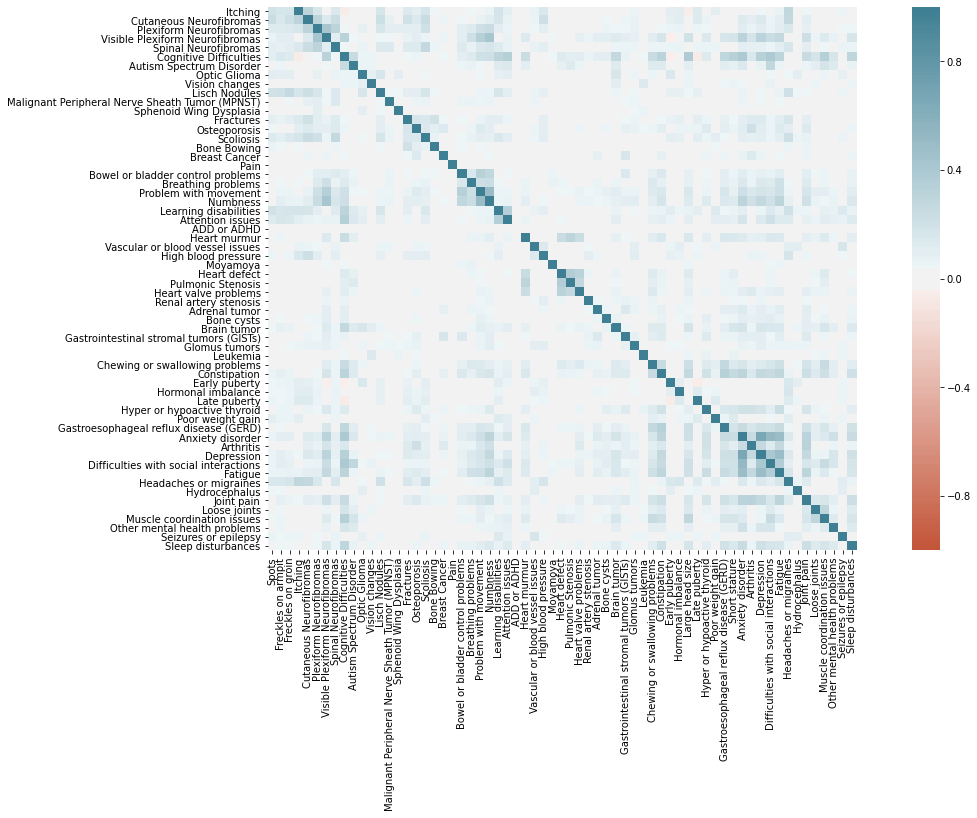

In [29]:
import seaborn as sns
plt.figure(figsize = (20, 10))
ax = sns.heatmap(
    vals, xticklabels = symptoms.columns, yticklabels = target, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [30]:
corr = pd.DataFrame(vals, columns = symptoms.columns, index = target)

In [31]:
tmp = corr.replace(1, np.nan)

In [32]:
high_corr = {}
for col in tmp.columns: 
    high_corr[col] = dict(round(tmp[col][tmp[col] > 0.20].sort_values(ascending = False), 2))

### Exporting correlation table
now I'll export the current correlation to feed into the table.

In [33]:
symptom_relations = pd.DataFrame(corr.stack()).reset_index()

In [34]:
symptom_relations.columns = ['target_id', 'symptom_id', 'phi_correlation']

In [35]:
symptom_relations.head(3)

,target_id,symptom_id,phi_correlation
0,Itching,Spots,0.187998
1,Itching,Freckles on armpit,0.161088
2,Itching,Freckles on groin,0.179284


Now change it to the index from keys

In [36]:
key_dict = dict(zip(keys.symptom, keys.index))

In [37]:
symptom_relations = symptom_relations.replace(key_dict)

In [38]:
symptom_relations.head(5)

,target_id,symptom_id,phi_correlation
0,4,1,0.187998
1,4,2,0.161088
2,4,3,0.179284
3,4,4,1.000000
4,4,5,0.304019


In [39]:
# save symptom_relations table
symptom_relations.to_json('data/symptom_relations.json', orient = 'table')

In [40]:
keys = keys.rename(columns = {'symptom': 'name'})
keys.to_json('data/symptoms.json', orient = 'table')